# 1. Import libraries and CSV -> dataframe

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [2]:
hdb_housing_data_df = pd.read_csv(r"F:\Data Science Grand Track\Machine Learning\datasets\housing\HDB_Resale_Price_2017_2025.csv")

In [3]:
display(hdb_housing_data_df)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
216879,2025-07,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,61 years 05 months,980000.0
216880,2025-09,YISHUN,EXECUTIVE,877,YISHUN ST 81,10 TO 12,145.0,Maisonette,1987,61 years 03 months,980000.0
216881,2025-09,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,61 years 04 months,990000.0
216882,2025-05,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,04 TO 06,147.0,Multi Generation,1987,61 years 06 months,945000.0


# 2. Convert dataframe -> numeric dataframe

## 2.1: Drop non-n rooms flat type

### See all values in flat_type

In [4]:
hdb_housing_data_df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

### Drop `MULTI-GENERATION` and `EXECUTIVE`

In [5]:
hdb_housing_data_df = hdb_housing_data_df[~hdb_housing_data_df['flat_type'].isin(['MULTI-GENERATION', 'EXECUTIVE'])]

### Test to see if it's removed

In [6]:
display(hdb_housing_data_df)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
216822,2025-07,YISHUN,5 ROOM,871,YISHUN ST 81,10 TO 12,122.0,Improved,1988,61 years 09 months,735000.0
216823,2025-07,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,61 years 04 months,755000.0
216824,2025-08,YISHUN,5 ROOM,844,YISHUN ST 81,01 TO 03,127.0,Improved,1988,62 years 05 months,735000.0
216825,2025-08,YISHUN,5 ROOM,841,YISHUN ST 81,04 TO 06,127.0,Improved,1988,61 years 05 months,795000.0


## 2.2: Drop non-numerical columns

In [7]:
hdb_housing_data_df = hdb_housing_data_df[['flat_type','lease_commence_date','floor_area_sqm','resale_price']]

In [8]:
display(hdb_housing_data_df)

,flat_type,lease_commence_date,floor_area_sqm,resale_price
0,2 ROOM,1979,44.0,232000.0
1,3 ROOM,1978,67.0,250000.0
2,3 ROOM,1980,67.0,262000.0
3,3 ROOM,1980,68.0,265000.0
4,3 ROOM,1980,67.0,265000.0
...,...,...,...,...
216822,5 ROOM,1988,122.0,735000.0
216823,5 ROOM,1987,122.0,755000.0
216824,5 ROOM,1988,127.0,735000.0
216825,5 ROOM,1988,127.0,795000.0


## 2.3: Convert to strict numerical

### Convert lease_date -> age

#### Change type of `lease_commence_date`

In [9]:
hdb_housing_data_df['lease_commence_date'] = hdb_housing_data_df['lease_commence_date'].astype(int)

C:\Users\KwangCrib\AppData\Local\Temp\ipykernel_8036\22193483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdb_housing_data_df['lease_commence_date'] = hdb_housing_data_df['lease_commence_date'].astype(int)


#### Function to convert

In [10]:
import datetime

current_year = datetime.datetime.now().year
print(current_year)


2025


In [11]:
hdb_housing_data_df['age'] = current_year - hdb_housing_data_df['lease_commence_date']

C:\Users\KwangCrib\AppData\Local\Temp\ipykernel_8036\837666058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdb_housing_data_df['age'] = current_year - hdb_housing_data_df['lease_commence_date']


In [12]:
display(hdb_housing_data_df)

,flat_type,lease_commence_date,floor_area_sqm,resale_price,age
0,2 ROOM,1979,44.0,232000.0,46
1,3 ROOM,1978,67.0,250000.0,47
2,3 ROOM,1980,67.0,262000.0,45
3,3 ROOM,1980,68.0,265000.0,45
4,3 ROOM,1980,67.0,265000.0,45
...,...,...,...,...,...
216822,5 ROOM,1988,122.0,735000.0,37
216823,5 ROOM,1987,122.0,755000.0,38
216824,5 ROOM,1988,127.0,735000.0,37
216825,5 ROOM,1988,127.0,795000.0,37


### Convert `flat_type` into room number

In [13]:
def convert_flat_type_to_room_number(flat_type: str) -> int:
    match flat_type:
        case "1 ROOM":
            return 1
        case "2 ROOM":
            return 2
        case "3 ROOM":
            return 3
        case "4 ROOM":
            return 4
        case "5 ROOM":
            return 5

In [14]:
hdb_housing_data_df['room_count'] = hdb_housing_data_df['flat_type'].apply(convert_flat_type_to_room_number)

C:\Users\KwangCrib\AppData\Local\Temp\ipykernel_8036\3827703771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdb_housing_data_df['room_count'] = hdb_housing_data_df['flat_type'].apply(convert_flat_type_to_room_number)


In [15]:
display(hdb_housing_data_df)

,flat_type,lease_commence_date,floor_area_sqm,resale_price,age,room_count
0,2 ROOM,1979,44.0,232000.0,46,2
1,3 ROOM,1978,67.0,250000.0,47,3
2,3 ROOM,1980,67.0,262000.0,45,3
3,3 ROOM,1980,68.0,265000.0,45,3
4,3 ROOM,1980,67.0,265000.0,45,3
...,...,...,...,...,...,...
216822,5 ROOM,1988,122.0,735000.0,37,5
216823,5 ROOM,1987,122.0,755000.0,38,5
216824,5 ROOM,1988,127.0,735000.0,37,5
216825,5 ROOM,1988,127.0,795000.0,37,5


## 2.4: Drop all non-numeric columns

In [16]:
hdb_housing_data_df = hdb_housing_data_df[['floor_area_sqm','room_count','age','resale_price']]

In [17]:
display(hdb_housing_data_df)

,floor_area_sqm,room_count,age,resale_price
0,44.0,2,46,232000.0
1,67.0,3,47,250000.0
2,67.0,3,45,262000.0
3,68.0,3,45,265000.0
4,67.0,3,45,265000.0
...,...,...,...,...
216822,122.0,5,37,735000.0
216823,122.0,5,38,755000.0
216824,127.0,5,37,735000.0
216825,127.0,5,37,795000.0


## 2.5: Verify shape:

In [18]:
columns_list = ['floor_area_sqm','room_count','age','resale_price']
for col in columns_list:
    print(hdb_housing_data_df[col].shape)

(201134,)
(201134,)
(201134,)
(201134,)


# 3. Training Model

## 3.1: Split into X and y

In [19]:
X = hdb_housing_data_df[['floor_area_sqm','room_count','age']]
y = hdb_housing_data_df['resale_price']

In [20]:
print(X.shape)
print(y.shape)

(201134, 3)
(201134,)


## 3.2: Split into train and test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 3.3: Create model

In [22]:
# Create object
flat_prediction_model = LinearRegression()

# Fit to X_train, y_train
flat_prediction_model.fit(X_train, y_train)

LinearRegression()

## 3.4: Predict on testing

In [23]:
predict_df = (flat_prediction_model.predict(X_test))

In [24]:
display(predict_df)

array([538858.91446487, 581608.06365704, 376102.07331737, ...,
       370538.12694946, 623427.88771479, 599257.31464479])

## 3.5: Export clean df -> CSV

In [25]:
hdb_housing_data_df.to_csv("hdb_resale_data_cleaned.csv")

# 4. Plotting and accuracies

## 4.1: Calculate RMSE (Root Mean Square Error)

## 4.2: Calculate R^2 score on testing data

In [26]:
r_square = flat_prediction_model.score(X_test, y_test)
print(r_square)

0.40020307186795534


## 4.3: Cross validation  

In [27]:
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold Object
k_fold_validation = KFold(
    n_splits=10, # Random fold
    shuffle=True,
    random_state=40
)

cv_scr = cross_val_score(flat_prediction_model, X, y, cv=k_fold_validation)

In [28]:
print(cv_scr)

[0.40221004 0.39585681 0.39968542 0.39648095 0.39238947 0.39462693
 0.39453083 0.39476946 0.39861067 0.39449149]


In [29]:
print(np.mean(cv_scr))

0.3963652071367081


# 5. Lasso, Ridge and Regularization  

## 5.1: Lasso

R^2 score: 0.4002030718679559, alpha set to 0
R^2 score: 0.4002030718254931, alpha set to 0.001
R^2 score: 0.400203071443322, alpha set to 0.01
R^2 score: 0.40020306762109936, alpha set to 0.1
R^2 score: 0.40020302934758933, alpha set to 1
R^2 score: 0.40020285811625367, alpha set to 5
R^2 score: 0.4002026414956954, alpha set to 10
R^2 score: 0.4002021996866797, alpha set to 20
R^2 score: 0.40020174651792984, alpha set to 30
R^2 score: 0.40020080640679356, alpha set to 50
R^2 score: 0.40019826262888214, alpha set to 100
R^2 score: 0.40019237685479303, alpha set to 200
R^2 score: 0.40016894395263414, alpha set to 500
R^2 score: 0.40011414203416806, alpha set to 1000


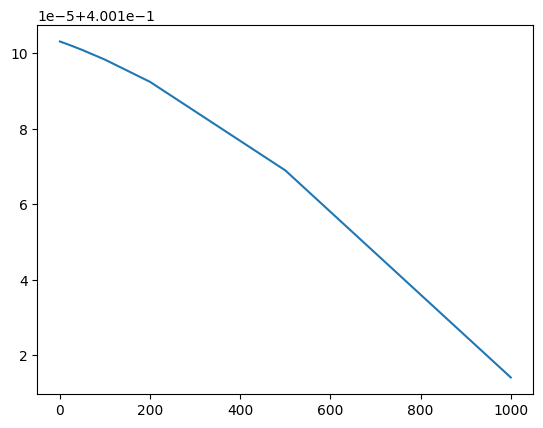

In [31]:
from sklearn.linear_model import Ridge, Lasso

# Set the range of alpha
alpha_values_list = [0, 0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 50, 100, 200, 500, 1000]

# Set the list of ridge score (measure of performance)
ridge_scores = []

for alpha_value in alpha_values_list:
    # Create a Ridge object
    model_with_ridge = Ridge(alpha=alpha_value)
    
    # Fit the data with training
    model_with_ridge.fit(X_train, y_train)
    
    # Calculate R_square
    r_sq = model_with_ridge.score(X_test, y_test)
    
    # Print one at a time:
    print("R^2 score: {r2}, alpha set to {alpha}".format(r2=r_sq, alpha = alpha_value))
    
    # Append to
    ridge_scores.append(r_sq)
    
plt.plot(alpha_values_list, ridge_scores)
plt.show()

In [ ]:
"""
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()
"""